In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities list 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=flinders
Processing Record 2 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=souillac
Processing Record 3 | Kemijärvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=kemijarvi
Processing Record 4 | Bahir Dar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=bahir%20dar
City not found. Skipping...
Processing Record 5 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=lavrentiya
Processing Record 6 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=zhigansk
Processing Record 7 | Vaini
http://api.openweat

Processing Record 57 | Pinhão
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=pinhao
Processing Record 58 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=karratha
Processing Record 59 | Pundaguitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=pundaguitan
Processing Record 60 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=palmer
Processing Record 61 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=los%20llanos%20de%20aridane
Processing Record 62 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=butaritari
Processing Record 63 | Brinkovskaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPI

Processing Record 113 | Hastings
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=hastings
Processing Record 114 | Lock Haven
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=lock%20haven
Processing Record 115 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=codrington
City not found. Skipping...
Processing Record 116 | Suruç
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=suruc
Processing Record 117 | Winchester
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=winchester
Processing Record 118 | San Fernando
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=san%20fernando
Processing Record 119 | Wanlaweyn
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 169 | Green River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=green%20river
Processing Record 170 | Erzin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=erzin
Processing Record 171 | Mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=mahajanga
Processing Record 172 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=kamenka
Processing Record 173 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=grindavik
City not found. Skipping...
City not found. Skipping...
Processing Record 174 | Churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=churapcha
Processing Record 175 | Kahului
http://api.openweathermap.org/data/2

Processing Record 224 | Taikang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=taikang
Processing Record 225 | Samokov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=samokov
Processing Record 226 | Mazatlán
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=mazatlan
Processing Record 227 | Canary Islands
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=canaries
Processing Record 228 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=faanui
Processing Record 229 | Coolum Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=coolum%20beach
Processing Record 230 | El Alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf

Processing Record 280 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=nouadhibou
Processing Record 281 | Arecibo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=arecibo
Processing Record 282 | Samaná
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=samana
City not found. Skipping...
Processing Record 283 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=brae
Processing Record 284 | Hong Kong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=victoria
Processing Record 285 | Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=abu%20dhabi
City not found. Skipping...
City not found. Skipping...
Processing Record 286 | Bereket
http://api.openweat

Processing Record 336 | San Buenaventura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=san%20buenaventura
Processing Record 337 | Partyzany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=partyzany
Processing Record 338 | Kushima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=kushima
Processing Record 339 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=isangel
Processing Record 340 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=mogadishu
Processing Record 341 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=port%20elizabeth
Processing Record 342 | Manatí
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 390 | Galveston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=galveston
Processing Record 391 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=tessalit
Processing Record 392 | Hwange
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=hwange
Processing Record 393 | Vryburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=vryburg
Processing Record 394 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=olafsvik
City not found. Skipping...
Processing Record 395 | Ribeira Brava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=ribeira%20brava
Processing Record 396 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 446 | Hofn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=hofn
Processing Record 447 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=yulara
Processing Record 448 | Kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=kedrovyy
Processing Record 449 | Imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=imbituba
Processing Record 450 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=tiksi
Processing Record 451 | City of San Pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=san%20pedro
Processing Record 452 | Mānsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=man

Processing Record 502 | Nautla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=nautla
Processing Record 503 | Beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=beloha
Processing Record 504 | Morehead
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=morehead
Processing Record 505 | Noshiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=noshiro
Processing Record 506 | Lumsden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=lumsden
Processing Record 507 | Stonewall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=stonewall
Processing Record 508 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=

Processing Record 557 | Tevaitoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=tevaitoa
Processing Record 558 | Lüderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=luderitz
Processing Record 559 | Ust'-Ishim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=ust-ishim
Processing Record 560 | Alta Floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=alta%20floresta
Processing Record 561 | Liverpool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=liverpool
Processing Record 562 | Chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580abaf95ec677dce&q=chara
Processing Record 563 | Sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=aebf273b479628c580a

### Convert Raw Data to DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

In [6]:
# Save data frame to CSV
#weather_data.to_csv('Output_CSV/weather_data.csv')
weather_data.to_csv (r'C:\Users\sunny\Desktop\export_dataframe.csv', index = False, header=True)

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Flinders,47,AU,1617825909,92,-34.5833,150.8552,64.99,1.01
1,Souillac,75,MU,1617825910,78,-20.5167,57.5167,80.60,11.50
2,Kemijärvi,100,FI,1617825912,97,66.7131,27.4306,26.31,2.59
3,Bahir Dar,67,ET,1617825913,31,11.5936,37.3908,77.49,5.37
4,Lavrentiya,82,RU,1617825914,90,65.5833,-171.0000,-6.66,5.10


### Plotting the Data

Latitude vs. Temperature Plot

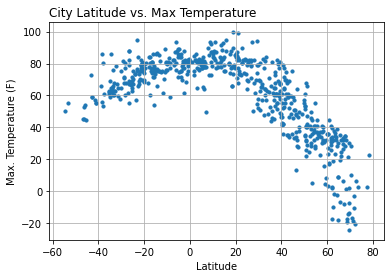

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" , loc = "Left")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_temp.png")

# Show plot
plt.show()

Latitude vs. Humidity Plot

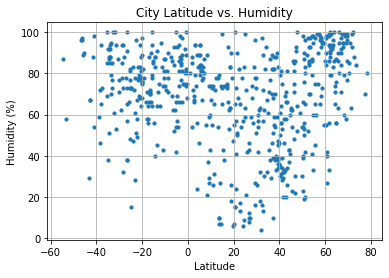

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_humidity.png")

# Show plot
plt.show()

Latitude vs. Cloudiness Plot

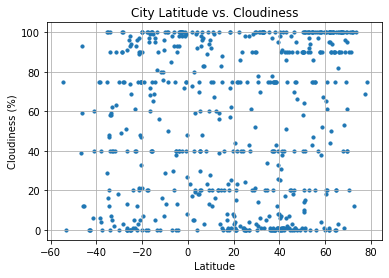

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_cloudiness.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

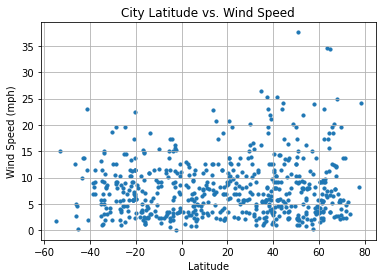

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("lat_vs_windspeed.png")

# Show plot
plt.show()


In [11]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

In [12]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Flinders,47,AU,1617825909,92,-34.5833,150.8552,64.99,1.01
1,Souillac,75,MU,1617825910,78,-20.5167,57.5167,80.60,11.50
2,Kemijärvi,100,FI,1617825912,97,66.7131,27.4306,26.31,2.59
3,Bahir Dar,67,ET,1617825913,31,11.5936,37.3908,77.49,5.37
4,Lavrentiya,82,RU,1617825914,90,65.5833,-171.0000,-6.66,5.10


## Seaborn plotting 
Latitude vs Temp Seaborn plot

<AxesSubplot:xlabel='Lat', ylabel='Max Temp'>

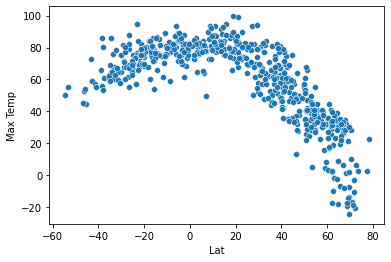

In [13]:
import seaborn as sns
sns.scatterplot(x ="Lat" , y="Max Temp" , data=weather_data)

Latitude vs. Humidity Plot

<AxesSubplot:xlabel='Lat', ylabel='Humidity'>

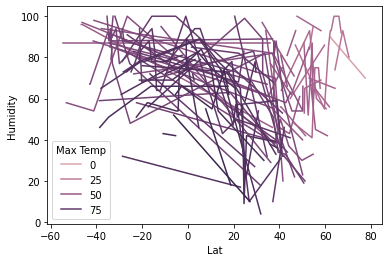

In [14]:
import seaborn as sns
sns.lineplot(x ="Lat" , y="Humidity" , data=weather_data , ci=None , hue = "Max Temp")

<AxesSubplot:xlabel='Lat', ylabel='Humidity'>

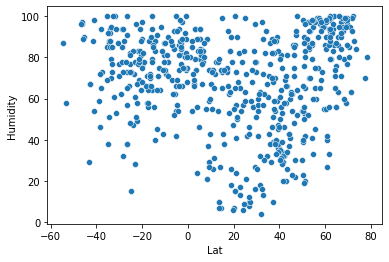

In [15]:
import seaborn as sns
sns.scatterplot(x = "Lat" , y="Humidity" , data=weather_data)

Latitude vs Cloudiness

<AxesSubplot:xlabel='Lat', ylabel='Cloudiness'>

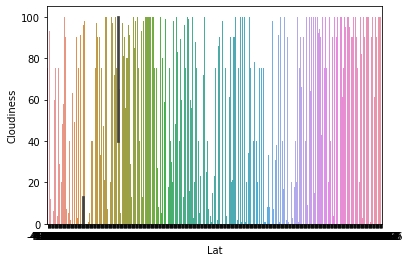

In [16]:
sns.barplot(x="Lat" , y="Cloudiness" , data=weather_data)


Latitude vs Windspeed

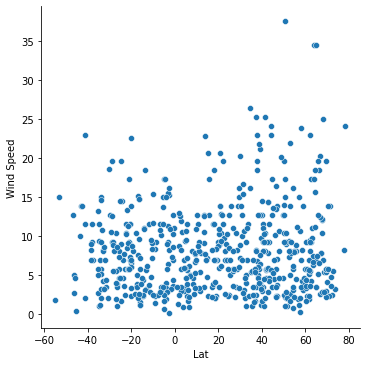

In [17]:
sns.relplot(x="Lat" , y="Wind Speed" , data=weather_data)

As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for interpreting data.

Provide a written description of three observable trends based on the data.

In [18]:
# As a matter of fact, temperature increases when we are close to the equator and decreases when we move towards the poles. This may be due to the Earth's tilt in the axis known as obliquity.

# Cloudiness and humidity dOes not show a strong correlation to latitude. The visualizations below show a great variety of values at similar latitudes.

# Wind speed appears to slightly increase as we move away from the equator. We would need to go beyond the ranged examined to make a definitive conclusion.


optional Homework

In [19]:
api_key = api_keys.api_key
# Starting URL for 5 day weather forecast API Call
url = "http://pro.openweathermap.org/data/2.5/forecast/hourly?q={city name}&appid=" + api_key

In [20]:
search_data = []
city_list =[]
country_list = []
searchCnt = 0
print("Beginning data retrieval")
print("------------------------")
for city in cities:
    try :
        print(f"Processing record {searchCnt} for the city :{city} ")
        searchCnt +=1
        response = requests.get(query_url + city)
        respnse.json()
        search_data.append(search)
        city_list.append(city)
        country_list.append(country)
        
        print(f"Record found for city: {city} with city id :{searchCityID}")
    except:
        print("City not found. Skipping...")
    continue
        

Beginning data retrieval
------------------------
Processing record 0 for the city :flinders 
City not found. Skipping...
Processing record 1 for the city :souillac 
City not found. Skipping...
Processing record 2 for the city :kemijarvi 
City not found. Skipping...
Processing record 3 for the city :bahir%20dar 
City not found. Skipping...
Processing record 4 for the city :louisbourg 
City not found. Skipping...
Processing record 5 for the city :lavrentiya 
City not found. Skipping...
Processing record 6 for the city :zhigansk 
City not found. Skipping...
Processing record 7 for the city :vaini 
City not found. Skipping...
Processing record 8 for the city :waddan 
City not found. Skipping...
Processing record 9 for the city :puerto%20ayora 
City not found. Skipping...
Processing record 10 for the city :makakilo%20city 
City not found. Skipping...
Processing record 11 for the city :khatanga 
City not found. Skipping...
Processing record 12 for the city :cape%20town 
City not found. Skip

Processing record 230 for the city :helena 
City not found. Skipping...
Processing record 231 for the city :boa%20vista 
City not found. Skipping...
Processing record 232 for the city :byron%20bay 
City not found. Skipping...
Processing record 233 for the city :kungurtug 
City not found. Skipping...
Processing record 234 for the city :wanning 
City not found. Skipping...
Processing record 235 for the city :taikang 
City not found. Skipping...
Processing record 236 for the city :samokov 
City not found. Skipping...
Processing record 237 for the city :mazatlan 
City not found. Skipping...
Processing record 238 for the city :canaries 
City not found. Skipping...
Processing record 239 for the city :faanui 
City not found. Skipping...
Processing record 240 for the city :coolum%20beach 
City not found. Skipping...
Processing record 241 for the city :el%20alto 
City not found. Skipping...
Processing record 242 for the city :kapaa 
City not found. Skipping...
Processing record 243 for the city

City not found. Skipping...
Processing record 453 for the city :chaguanas 
City not found. Skipping...
Processing record 454 for the city :umba 
City not found. Skipping...
Processing record 455 for the city :canatlan 
City not found. Skipping...
Processing record 456 for the city :oyem 
City not found. Skipping...
Processing record 457 for the city :valley%20station 
City not found. Skipping...
Processing record 458 for the city :vondrozo 
City not found. Skipping...
Processing record 459 for the city :labuhan 
City not found. Skipping...
Processing record 460 for the city :lorengau 
City not found. Skipping...
Processing record 461 for the city :peniche 
City not found. Skipping...
Processing record 462 for the city :wajir 
City not found. Skipping...
Processing record 463 for the city :zdvinsk 
City not found. Skipping...
Processing record 464 for the city :oswego 
City not found. Skipping...
Processing record 465 for the city :sinkat 
City not found. Skipping...
Processing record 4

In [21]:
data = { 
    "cityName": city_list,
    "country" :country_list,
    "search" :search_data
    }
weather_data = pd.DataFrame(data)
weather_data

,cityName,country,search
